# starter code

In [104]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [ ]:
import pandas as pd
df = pd.read_csv("Indiegogoproject.csv")

In [ ]:
df.columns

In [ ]:
df.head(3)

In [121]:
df.shape

(20970, 19)

In [ ]:
df.head(3)

In [117]:
df.drop('bullet_point', axis = 1, inplace = True)
#df.drop(['price_offered','price_retail'], axis = 1, inplace = True)


ValueError: labels ['bullet_point'] not contained in axis

In [118]:
df.drop('price_offered', axis = 1, inplace = True)
df.drop('price_retail', axis = 1, inplace = True)

In [119]:
df.head(1)

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-10T14:48:15-07:00,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...


In [123]:
pd.isnull(df)

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df[pd.isnull(df).any(axis=1)]

In [ ]:
df.dropna()

In [140]:
df.shape

(20970, 19)

In [139]:
df.dropna().shape

(20927, 19)

In [143]:
df.dropna(axis=1, how='all', inplace = True)


In [144]:
df.dropna().shape

(20927, 19)

In [166]:
df.dropna(axis=1, how='any',inplace = True)

In [168]:
df.dropna().shape

(20970, 17)

In [183]:
df.fillna(0)

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-10T14:48:15-07:00,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...
1,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-07-22T16:56:59-07:00,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...
2,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-10-01T14:15:57-07:00,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...
3,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711,8.92775,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-09-16T06:54:31-07:00,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...
4,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100,1.0333333333333334,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-01-31T00:03:01-08:00,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...
5,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-01-03T16:27:27-08:00,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...
6,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806,0.7863414634146342,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,false,null,2018-02-07T20:07:42-08:00,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...
7,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998,0.32385581206966385,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-17T10:37:24-07:00,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...
8,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910,1.0034482758620689,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-26T17:28:01-07:00,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...
9,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955,0.0791,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-11-29T09:42:04-08:00,null,null,556754,campaign,https://www.indiegogo.com/explore/all?project_...


In [ ]:
df.dtypes

In [176]:
pd.to_numeric(df.funds_raised_percent, downcast='float')

ValueError: Unable to parse string "null" at position 19448

In [ ]:
df["funds_raised_percent"] = df.funds_raised_percent.convert_objects(convert_numeric=True)

In [ ]:
df.dtypes

In [175]:
df.loc[19448,:] 

category                                                           Comics
category_url                                              /explore/comics
clickthrough_url        /products/signed-evil-dead-2-graphic-novel-tri...
close_date                                                           null
currency                                                              USD
funds_raised_amount                                                  null
funds_raised_percent                                                 null
image_url               https://c1.iggcdn.com/indiegogo-media-prod-cld...
is_indemand                                                         False
is_pre_launch                                                        null
offered_by                                                           null
open_date                                                            null
product_id                                                            119
product_stage                         

In [177]:


#df.round({'funds_raised_percent': 2})
df.round(2)
df['funds_raised_percent']

0        0.21104545454545454
1         1.0005555555555556
2        0.26260869565217393
3                    8.92775
4         1.0333333333333334
5                       0.55
6         0.7863414634146342
7        0.32385581206966385
8         1.0034482758620689
9                     0.0791
10                     0.652
11        1.2816666666666667
12       0.38285714285714284
13                    1.0596
14        1.1686666666666667
15        0.4786666666666667
16        1.0417222222222222
17                     1.024
18                     0.132
19                    1.1377
20                     7.504
21                    1.6975
22                      1.01
23                      1.08
24                    0.2571
25                    1.0205
26                     0.095
27                     7.583
28        0.2743333333333333
29                         1
                ...         
20940                   null
20941                   null
20942                   null
20943         

In [184]:
df['funds_raised_percent'] = df.funds_raised_percent.astype(float)

ValueError: could not convert string to float: null

In [178]:
df['funds_raised_percent']
df[(df.funds_raised_percent>=5)]

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-10T14:48:15-07:00,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...
1,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-07-22T16:56:59-07:00,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...
2,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-10-01T14:15:57-07:00,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...
3,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711,8.92775,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-09-16T06:54:31-07:00,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...
4,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100,1.0333333333333334,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-01-31T00:03:01-08:00,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...
5,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-01-03T16:27:27-08:00,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...
6,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806,0.7863414634146342,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,false,null,2018-02-07T20:07:42-08:00,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...
7,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998,0.32385581206966385,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-17T10:37:24-07:00,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...
8,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910,1.0034482758620689,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-26T17:28:01-07:00,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...
9,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955,0.0791,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-11-29T09:42:04-08:00,null,null,556754,campaign,https://www.indiegogo.com/explore/all?project_...


# count by category

In [115]:
df[df.funds_raised_percent>=1]

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,...,open_date,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-03-10T14:48:15-07:00,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...
1,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-07-22T16:56:59-07:00,null,null,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken"
2,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-10-01T14:15:57-07:00,null,null,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30
3,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711,8.92775,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2014-09-16T06:54:31-07:00,null,null,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing
4,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100,1.0333333333333334,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-01-31T00:03:01-08:00,null,null,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios
5,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2014-01-03T16:27:27-08:00,null,null,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space
6,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806,0.7863414634146342,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,false,...,2018-02-07T20:07:42-08:00,null,null,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit
7,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998,0.32385581206966385,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-06-17T10:37:24-07:00,null,null,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine
8,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910,1.0034482758620689,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-06-26T17:28:01-07:00,null,null,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft
9,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955,0.0791,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-11-29T09:42:04-08:00,null,null,null,null,556754,campaign,https://www.indiegogo.com/explore/all?project_...,Design meets social innovation. For every pro...,A start-up Desig

In [83]:
df.groupby('category').category.count().sort_values(ascending=False)

category
Home                       894
Travel & Outdoors          875
Phones & Accessories       864
Health & Fitness           863
Fashion & Wearables        861
Productivity               849
Comics                     841
Local Businesses           840
Art                        840
Dance & Theater            840
Education                  840
Environment                840
Film                       840
Writing & Publishing       840
Music                      840
Photography                840
Video Games                840
Animal Rights              840
Transportation             835
Food & Beverages           825
Human Rights               759
Web Series & TV Shows      725
Audio                      531
Camera Gear                470
Wellness                   393
Culture                    352
Energy & Green Tech        309
Tabletop Games             278
Podcasts, Blogs & Vlogs    114
Spirituality                92
Name: category, dtype: int64

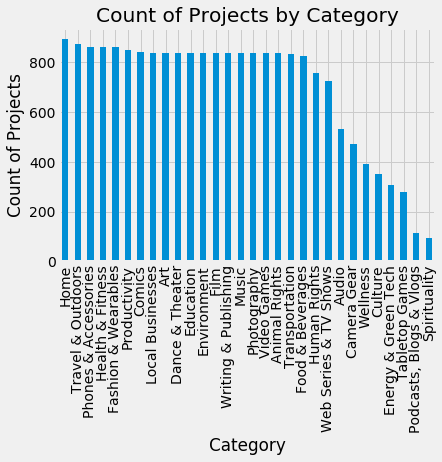

In [77]:
df.groupby('category').category.count().sort_values(ascending=False).plot(kind='bar')

plt.title("Count of Projects by Category")
plt.xlabel("Category")
plt.ylabel("Count of Projects")
plt.show( )


In [91]:
#df[(df.funds_raised_percent>=1)]

df.loc[df.is_indemand=='True']

df[(df.is_indemand=='True')]

TypeError: invalid type comparison

In [82]:
funded.groupby('category').funds_raised_percent.count().sort_values(ascending=False)

category
Home                       894
Travel & Outdoors          875
Phones & Accessories       864
Health & Fitness           863
Fashion & Wearables        861
Productivity               849
Comics                     841
Local Businesses           840
Art                        840
Dance & Theater            840
Education                  840
Environment                840
Film                       840
Writing & Publishing       840
Music                      840
Photography                840
Video Games                840
Animal Rights              840
Transportation             835
Food & Beverages           825
Human Rights               759
Web Series & TV Shows      725
Audio                      531
Camera Gear                470
Wellness                   393
Culture                    352
Energy & Green Tech        309
Tabletop Games             278
Podcasts, Blogs & Vlogs    114
Spirituality                92
Name: funds_raised_percent, dtype: int64

TypeError: Empty 'DataFrame': no numeric data to plot

In [68]:
df.groupby('category').funds_raised_percent.max()

category
Animal Rights                             9.492
Art                                     8.92775
Audio                                      null
Camera Gear                                null
Comics                                     null
Culture                    8.541666666666667E-4
Dance & Theater                          9.5E-4
Education                  8.666666666666666E-4
Energy & Green Tech                        null
Environment                8.741258741258741E-4
Fashion & Wearables                        null
Film                                       9.94
Food & Beverages                           null
Health & Fitness                           null
Home                                       null
Human Rights                             9.0E-4
Local Businesses           8.181818181818182E-4
Music                                     9.194
Phones & Accessories                       null
Photography                              7.5E-4
Podcasts, Blogs & Vlogs        

In [52]:
df.groupby('category').funds_raised_amount.agg(['count','min','max','mean'])

DataError: No numeric types to aggregate

In [11]:
#pick 7 out of 22 attributes to work with

df.columns

Index([u'bullet_point', u'category', u'category_url', u'clickthrough_url',
       u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'image_url', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_id', u'project_type',
       u'source_url', u'tagline', u'title'],
      dtype='object')

,bullet_point,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,...,open_date,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title
category,,,,,,,,,,,,,,,,,,,,,
Art,null,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-03-10T14:48:15-07:00,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...
Art,null,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-07-22T16:56:59-07:00,null,null,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken"
Art,null,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-10-01T14:15:57-07:00,null,null,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30
Art,null,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711,8.92775,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2014-09-16T06:54:31-07:00,null,null,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing
Art,null,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100,1.0333333333333334,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-01-31T00:03:01-08:00,null,null,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios
Art,null,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2014-01-03T16:27:27-08:00,null,null,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space
Art,null,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806,0.7863414634146342,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,false,...,2018-02-07T20:07:42-08:00,null,null,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit
Art,null,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998,0.32385581206966385,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-06-17T10:37:24-07:00,null,null,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine
Art,null,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910,1.0034482758620689,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,...,2013-06-26T17:28:01-07:00,null,null,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft


In [37]:
#create the 7 subset of attributes to work with
#subset = ['category', 'funds_raised_amount', 'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'product_stage', 'tagline']



subset = ['category','funds_raised_amount', 'funds_raised_percent']
df.set_index('category')

df2 = df[subset].copy()


df2.head()

,category,funds_raised_amount,funds_raised_percent
0,Art,4643,0.21104545454545454
1,Art,1801,1.0005555555555556
2,Art,3020,0.26260869565217393
3,Art,35711,8.92775
4,Art,3100,1.0333333333333334


In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df2[:,0], df2[:,1], s=68);

TypeError: unhashable type

In [17]:
#Make a copy of df2 and assign it to X

X = df2.copy()

#Intialize kmeans with 2 clusters and random_state = 10
km = KMeans(n_clusters=2, random_state = 10)

#Fit model on X
km.fit(X)

#Generate labels

##Method 1
labs2 = km.labels_
##Method 2
labs2 = km.predict(X)

#Value_counts
pd.value_counts(labs2)


ValueError: could not convert string to float: The First-Travel Friendly Blanket